<a href="https://colab.research.google.com/github/JisbethDiaz/FCFM_Miner-a_de_Datos/blob/Miner%C3%ADa-de-datos/Avance2_PIA_Equipo4_Tecnica_miner%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AVANCE 2 PIA**

* Equipo #4
* Grupo: 02, Frecuencia de clase: Miércoles
* Integrantes:

  * 1857602 Díaz Vázquez Jisbeth Jaquelin.
  * 1842201 Ramiro Mayorga Julio César.
  * 1854552 Requenes Villarreal Linda Karina.
  * 1941443 Martínez Valdez Norma Isabel.


# **Severely Injured Workers**
URL: https://www.kaggle.com/jboysen/injured-workers



## *Descripción de la base de datos*

Desde el 1 de enero de 2015, la Administración de Seguridad y Salud Ocupacional (OSHA) exige a los empleadores que informen de todas las lesiones graves relacionadas con el trabajo que fueron ocurridas hasta el 28 de febrero de 2017 y fueron definidas (utilizando el Sistema de Clasificación de Lesiones y Enfermedades Profesionales) como amputación, hospitalización o pérdida de un ojo.


1. Tamaño de la base:

  Los datos se muestran en una tabla de dimensiones de 26 columnas x 21578 filas, donde la cantidad de columnas representa el incidente, las partes implicadas, el empleador, la lesión sufrida y el resultado final, y las filas abarcan el número total de incidentes en dicho periodo.

2. Columnas:

  * Address: Dirección (texto largo)
  * City: Ciudad (cadena)
  * State: Estado (cadena)
  * Latitude: Latitud (float)
  * Longitude: Longitud (float)
  * Primary NAICS: Línea de negocio principal de una empresa (entero)
  * Hospitalized: Hospitalizado (entero)
  * Amputation: Amputación (entero)
  * Inspection: Inspección (entero)
  * Final Narrative: Narración final (texto largo)
  * Nature: Naturaleza (cadena)
  * Part of Body: Parte del cuerpo (cadena)
  * Event: Evento (cadena)
  * Source: Procedencia (cadena)
  * Secondary Source: Segunda procedencia (cadena)

## *Justificación del uso de datos*

  Los accidentes de trabajo pueden ocurrir en cualquier momento, saber qué hacer y cómo actuar es fundamental para asegurar una oportuna atención al lesionado. Por esta razón, una aseguradora consideró importante tener un buen historial para poder informarse y realizar un análisis acerca del número de frecuencias de cada tipo de emergencia relacionada con su puesto, así como también su respectiva siniestralidad. Ya que con ello, es posible calcular pólizas de seguros contra accidentes laborales para los trabajadores de empresas establecidas.


##*Objetivos*

*   Principal:

  Predecir la frecuencia de lesiones en cada uno de los estados definiendo el grado de urgencia más común.

*   Secundario:

  Identificar en qué estados de Estados Unidos se presentan mayor cantidad de accidentes.



# **Limpieza de datos**


In [173]:
import pandas as pd
import numpy as np
import json
df = pd.read_csv('severeinjury.csv', encoding= 'unicode_escape') #https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

Las dimensiones de nuestra Base de datos 26 columnas y 21578 filas

In [174]:
df.shape

(21578, 26)

##*Datos sin manipulación*

Las primeras y ultimas 5 Filas de datos de nuestra base de datos

In [175]:
df.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


In [176]:
df.tail()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
21573,2017021908,1187496,28/2/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,28/2/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,28/2/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,28/2/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN
21577,2017021912,1187132,28/2/2017,"JV MANUFACTURING, INC.",701 Butterfield Coach Road,NaN,SPRINGDALE,ARKANSAS,72765.0,36.17,-94.09,333319,1,0.0,NaN,An employee was cutting the strapping on a bun...,111,Fractures,510,"Leg(s), unspecified",6239,"Struck by falling object or equipment, n.e.c.",2131,"Bundles, bales",NaN,NaN


Los nombres de las columnas y sus tipos de datos

In [177]:
df.columns

Index(['ID', 'UPA', 'EventDate', 'Employer', 'Address1', 'Address2', 'City',
       'State', 'Zip', 'Latitude', 'Longitude', 'Primary NAICS',
       'Hospitalized', 'Amputation', 'Inspection', 'Final Narrative', 'Nature',
       'NatureTitle', 'Part of Body', 'Part of Body Title', 'Event',
       'EventTitle', 'Source', 'SourceTitle', 'Secondary Source',
       'Secondary Source Title'],
      dtype='object')

In [178]:
df.dtypes


ID                          int64
UPA                         int64
EventDate                  object
Employer                   object
Address1                   object
Address2                   object
City                       object
State                      object
Zip                       float64
Latitude                  float64
Longitude                 float64
Primary NAICS              object
Hospitalized                int64
Amputation                float64
Inspection                float64
Final Narrative            object
Nature                      int64
NatureTitle                object
Part of Body                int64
Part of Body Title         object
Event                       int64
EventTitle                 object
Source                      int64
SourceTitle                object
Secondary Source          float64
Secondary Source Title     object
dtype: object

##*Modificación de columnas*

Cambiaremos el nombre a las columnas con espacios en ellas 

In [179]:
df.rename(columns = {'Primary NAICS':'Primary_NAICS'})

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary_NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,28/2/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,28/2/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,28/2/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,28/2/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN


In [180]:
df.rename(columns = {'Final Narrative':'Final_Narrative'})

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final_Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,28/2/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,28/2/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,28/2/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,28/2/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN


In [181]:
df.rename(columns = {'Part of Body':'Part_of_Body'})
df.rename(columns = {'Secondary Source':'Secondary_Source'})
df.rename(columns = {'Part of Body Title':'Part_of_Body_Title'})
df.rename(columns = {'Secondary Source Title':'Secondary_Source_Title'})

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary_Source_Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,28/2/2017,JPN Masonry LLC,806 Channing Place,NaN,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",NaN,NaN
21574,2017021909,1187261,28/2/2017,CR MEYER,1815 Marathon Ave.,NaN,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",NaN,NaN
21575,2017021910,1187351,28/2/2017,PHOENIX HOME CARE,353 River Bluff Drive,NaN,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1,0.0,NaN,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",NaN,NaN
21576,2017021911,1187282,28/2/2017,"Cross Insulation, Inc.",West Fargo New Construction,NaN,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,NaN,NaN


Clasificando los datos por las categorias de la columna State


In [182]:
df.State.unique()

array(['NEW YORK', 'WISCONSIN', 'PENNSYLVANIA', 'GEORGIA', 'FLORIDA',
       'COLORADO', 'OKLAHOMA', 'TEXAS', 'LOUISIANA', 'MISSISSIPPI',
       'NEW JERSEY', 'OHIO', 'ILLINOIS', 'NEBRASKA', 'NEW HAMPSHIRE',
       'KANSAS', 'MASSACHUSETTS', 'ARKANSAS', 'MICHIGAN', 'IDAHO',
       'MISSOURI', 'MAINE', 'CONNECTICUT', 'WEST VIRGINIA',
       'NORTH DAKOTA', 'MONTANA', 'NORTH CAROLINA', 'DELAWARE',
       'CALIFORNIA', 'AMERICAN SAMOA', 'DISTRICT OF COLUMBIA', 'ALABAMA',
       'TENNESSEE', 'OREGON', 'SOUTH DAKOTA', 'RHODE ISLAND', 'INDIANA',
       'VIRGINIA', 'NEW MEXICO', 'MARYLAND', 'UTAH', 'VERMONT', 'ARIZONA',
       'GUAM', 'IOWA', 'KENTUCKY', 'MINNESOTA', 'WASHINGTON',
       'SOUTH CAROLINA', 'HAWAII', 'PUERTO RICO', 'VIRGIN ISLANDS',
       'NEVADA', 'WYOMING', 'NORTHERN MARIANA ISLANDS', 'ALASKA'],
      dtype=object)

In [183]:
NY = df[df['State']=='NEW YORK']

NY.to_csv('Solo_NEW YORK.csv', index=False)
w = df[df['State']=='WASHINGTON']
w.to_csv('Solo_WASHINGTON.csv', index=False)

Filtrando datos de la columna Nature por State



In [184]:
NY_f = df.loc[df.State == 'NEW YORK'].Nature
NY_f

0         111
47        111
49         10
53       1510
63       1311
         ... 
21514     111
21521    1530
21522     111
21542    1311
21567    1311
Name: Nature, Length: 1069, dtype: int64

In [185]:
W_f = df.loc[df.State == 'WASHINGTON'].Nature
W_f

1450     1831
2153      111
2797      111
3339     1311
3795     2731
4027      194
4149      134
6566      111
6944     1972
9009     1311
9037      111
9149      111
9241      111
10156     111
10197     111
11605     160
12149     111
12555    1311
12735     111
12868     111
13377     111
14777     193
15770    1972
15778     111
16522     111
16564     111
16800      10
16954     143
16979     143
17104    1311
17610     111
17721     111
18506     111
19191     111
19462    1973
19547     111
19708      10
20668     160
20981     111
Name: Nature, dtype: int64

##*Manipulación de datos nulos*

Veremos los Datos Nulos y tomaremos acciones al respecto

In [186]:
df.isnull()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
21574,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
21575,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
21576,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [187]:

df.isnull().any()

ID                        False
UPA                       False
EventDate                 False
Employer                  False
Address1                   True
Address2                   True
City                       True
State                     False
Zip                        True
Latitude                   True
Longitude                  True
Primary NAICS              True
Hospitalized              False
Amputation                 True
Inspection                 True
Final Narrative           False
Nature                    False
NatureTitle               False
Part of Body              False
Part of Body Title        False
Event                     False
EventTitle                False
Source                    False
SourceTitle               False
Secondary Source           True
Secondary Source Title     True
dtype: bool

In [188]:
df.isnull().sum()

ID                            0
UPA                           0
EventDate                     0
Employer                      0
Address1                     10
Address2                  19717
City                          9
State                         0
Zip                          11
Latitude                     91
Longitude                    91
Primary NAICS                 2
Hospitalized                  0
Amputation                    2
Inspection                13756
Final Narrative               0
Nature                        0
NatureTitle                   0
Part of Body                  0
Part of Body Title            0
Event                         0
EventTitle                    0
Source                        0
SourceTitle                   0
Secondary Source          15766
Secondary Source Title    15766
dtype: int64

Para limpiar los datos nulos hay que trabajarlos en un data frame diferente

In [189]:
data_frame_0 = df.fillna(0) #Con esto llenamos todas las celdas con datos nulos con un 0
data_frame_0.to_csv('data_frame_0.csv', index=False)
data_frame_0

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,0,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,0,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1,0.0,1016582.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",0.0,0
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,0,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1,0.0,0.0,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,0,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,0,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1,0.0,1016344.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2017021908,1187496,28/2/2017,JPN Masonry LLC,806 Channing Place,0,WASHINGTON,DISTRICT OF COLUMBIA,20008.0,38.92,-76.99,238140,1,0.0,1215482.0,An employee fell from the third scaffold level...,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified",0.0,0
21574,2017021909,1187261,28/2/2017,CR MEYER,1815 Marathon Ave.,0,NEENAH,WISCONSIN,54956.0,44.16,-88.47,236220,1,0.0,1214207.0,An employee fell approximately 10 feet from a ...,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios",0.0,0
21575,2017021910,1187351,28/2/2017,PHOENIX HOME CARE,353 River Bluff Drive,0,BRANSON,MISSOURI,65616.0,36.61,-93.27,621610,1,0.0,0.0,An employee was walking down a flight of three...,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors",0.0,0
21576,2017021911,1187282,28/2/2017,"Cross Insulation, Inc.",West Fargo New Construction,0,WEST FARGO,NORTH DAKOTA,58078.0,46.87,-96.93,238310,1,0.0,1216894.0,An employee was hospitalized for carbon monoxi...,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide,0.0,0


In [190]:
df_drop = df.dropna() # Y con esta instrucción borramos las filas que contienen datos nulos
df_drop.to_csv('df_drop.csv', index=False)

##*Nuevo archivo con la base de datos editada*

In [191]:
df_drop_column = df.dropna(axis=1)#Para finalizar, con esta instrucción eliminamos las columnas con datos nulos
df_drop_column.to_csv('df_drop_column.csv', index=False)

# **Estadística básica de los datos**

In [112]:
#Identificando correlación de las columnas
correlacion=df.corr()

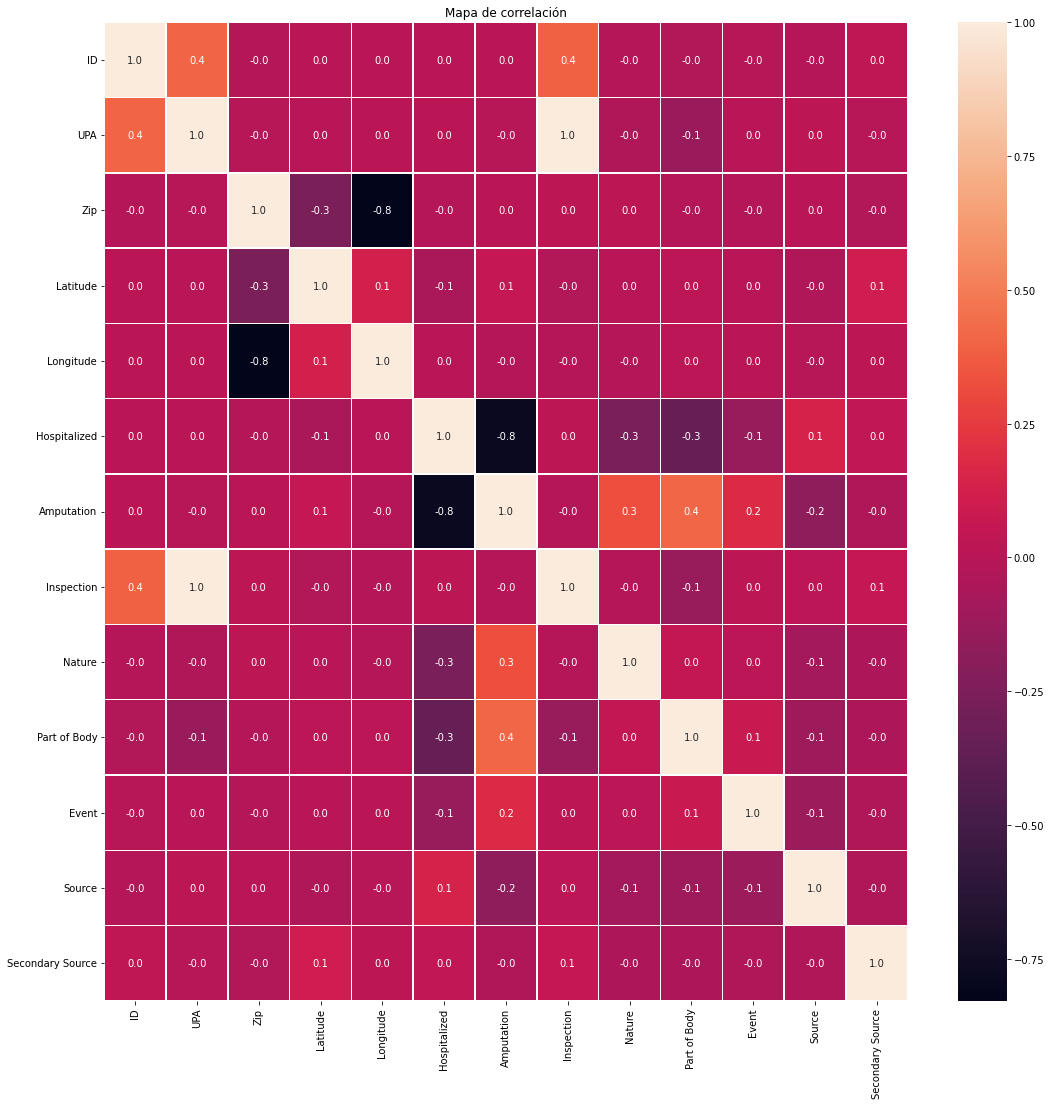

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Para fines de análisis, nos enfocaremos en si el paciente fue hospitalizado o no para saber la gravedad del accidente; por lo que identifiicamos que, debido a la baja correlación que tienen algunas columnas pueden ser eliminadas sin problema.

In [114]:
datos= data_frame_0.drop(['ID', 'UPA', 'Zip', 'Latitude', 'Longitude', 'Address1', 'Address2', 'City', 'Primary NAICS', 'Secondary Source',	'Secondary Source Title'], axis=1)


In [115]:
datos['State'].describe()


count     21578
unique       56
top       TEXAS
freq       3481
Name: State, dtype: object

In [193]:
datos.shape
3481/21578

0.16132171656316618

In [116]:
datos['Hospitalized'].describe()

count    21578.000000
mean         0.807999
std          0.412055
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Hospitalized, dtype: float64

In [117]:
datos['EventDate'].describe()

count        21578
unique         790
top       2/9/2015
freq            56
Name: EventDate, dtype: object

#**Gráficas**

En este apartado se analizarán distintos gráficos, los cuales incluirán una breve conclusión de los datos obtenidos.

Text(0, 0.5, 'Frecuencia')

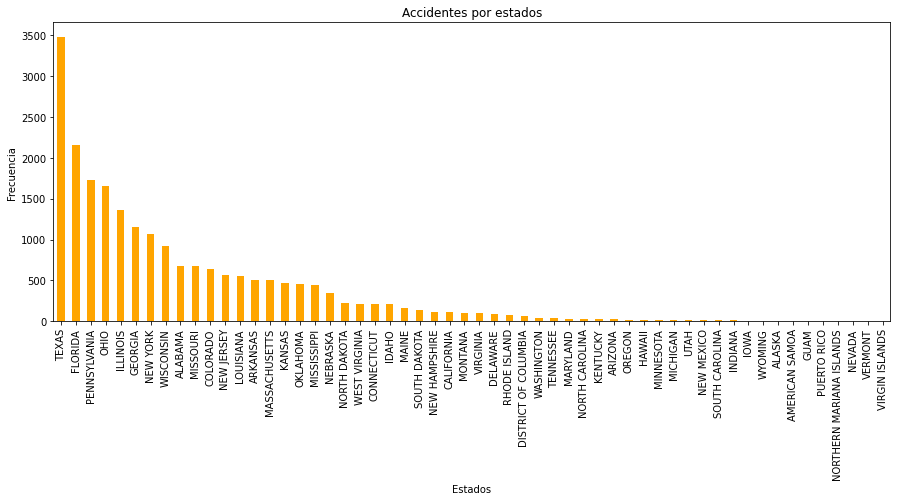

In [205]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pylab import *

plt.figure(figsize=(15,5.5))   #(ancho,altura) de la gráfica
datos['State'].value_counts().plot.bar(color='orange')
plt.title('Accidentes por estados')   #Nombre de la gráfica
xlabel('Estados')
ylabel('Frecuencia')

En  la gráfica anterior podemos observar la frecuencia de accidentes por estado. Esto es importante ya que el precio de los seguros de accidentes varía por estado según la frecuencia de lesiones.

Text(0, 0.5, 'Frecuencia')

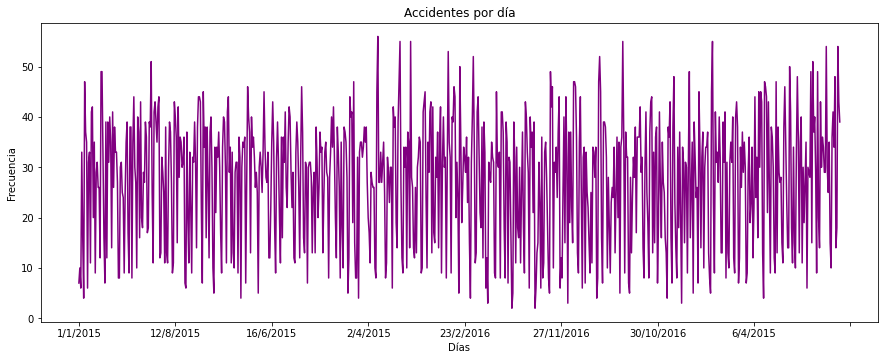

In [120]:
plt.figure(figsize=(15,5.5))  
datos['EventDate'].value_counts().sort_index().plot.line(color='purple')
plt.title('Accidentes por día')
xlabel('Días')
ylabel('Frecuencia')

Nuestra base de datos acumula eventos desde el 1 de enero de 2015 hasta el 28 de febrero de 2018. En la gráfica se puede apreciar que no tiene tendencia y probablemente una varianza estacionaria.
En nuestro caso, una aseguradora puede tener una idea del número de accidentes que se darán en el futuro. Esto les ayudará a calcular el monto de la reserva tecnica que tienen que tener para solventar los gastos por accidentes.

Text(0, 0.5, 'Frecuencia')

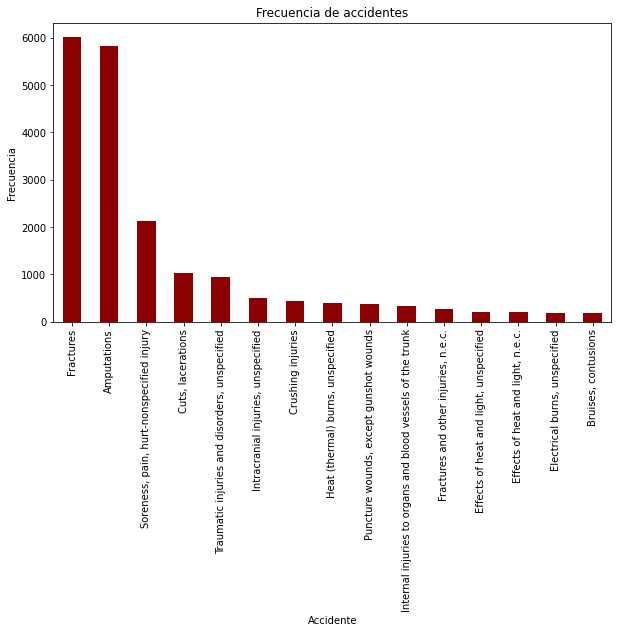

In [66]:
plt.figure(figsize=(10,5.5))
datos['NatureTitle'].value_counts().head(15).plot.bar(color='darkred')
plt.title('Frecuencia de accidentes')
xlabel('Accidente')
ylabel('Frecuencia')

En esta gráfica se observa el top 10 de los accidentes más frecuentes registrados en Estados Unidos.
Si tomar en cuenta el costo promedio que se tiene al presentar cada accidente, nos ayudará de igual manera en el cálculo de la reserva técnica.

Text(0, 0.5, 'Frecuencia')

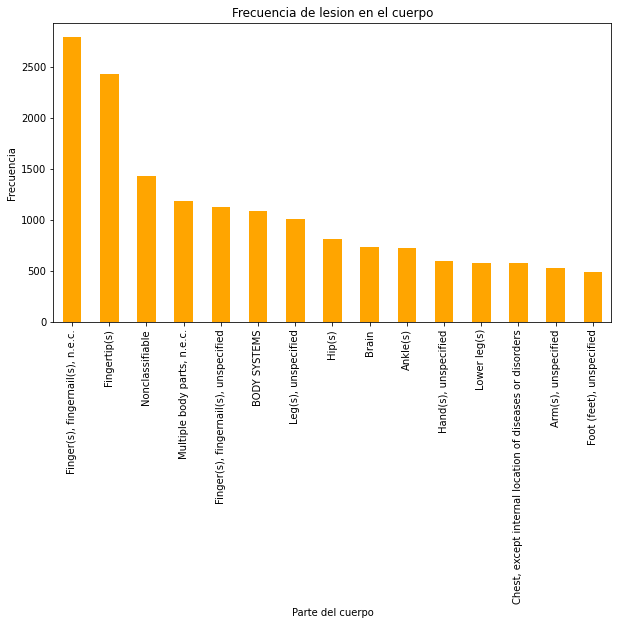

In [67]:
plt.figure(figsize=(10,5.5))
datos['Part of Body Title'].value_counts().head(15).plot.bar(color='orange')
plt.title('Frecuencia de lesion en el cuerpo')
xlabel('Parte del cuerpo')
ylabel('Frecuencia')

De igual manera se muestra el top 10 de partes del cuerpo que más se lesionan.

Text(0, 0.5, 'Frecuencia')

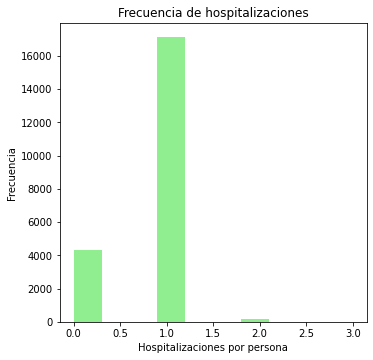

In [68]:
plt.figure(figsize=(5.5,5.5))
datos['Hospitalized'].plot.hist(color='lightgreen')
plt.title('Frecuencia de hospitalizaciones')
xlabel('Hospitalizaciones por persona')
ylabel('Frecuencia')

Dado lo anterior, señala que la mayoría de los pacientes fueron hospitalizados al menos una vez.
Muchos 

Text(0, 0.5, 'Frecuencia')

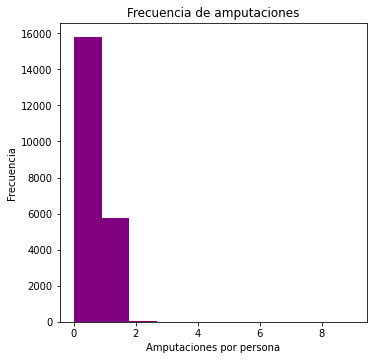

In [69]:
plt.figure(figsize=(5.5,5.5))
datos['Amputation'].plot.hist(color='purple')
plt.title('Frecuencia de amputaciones')
xlabel('Amputaciones por persona')
ylabel('Frecuencia')

Sin embargo, menos de la mitad de esos trabajadores necesitaron de alguna amputación.

##*Conclusión global*

  Los datos indican que el estado de Texas tiene una mayor frecuencia en lesiones laborales, ya que cuenta con aproximadamente el 16% de los accidentes de trabajo en Estados Unidos.
  Por otro lado, tenemos que el grado de urgencia más común en un lesionado es de fracturas y amputaciones, el cual corresponde al 55% de los accidentes más frecuentes, siendo los dedos el área del cuerpo con mayor ocurrencia de lesión.
  Por último, se distingue que el 74% de los trabajadores que fueron lesionados, contaron con una probabilidad menor al 50% para realizarse el proceso de amputación.



# **Método series de tiempo**


Nuestro principal objetivo es predecir la frecuencia de lesiones en cada uno de los estados.

In [125]:
%load_ext rpy2.ipython
%load_ext rmagic

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


Para ello, comenzamos visualizando los datos inicales. Dado a que durente el 2017 algunos días no se registraron, para tener una predicción confiable, decidimos utilizar solo los datos recabados hasta finales de 2016.

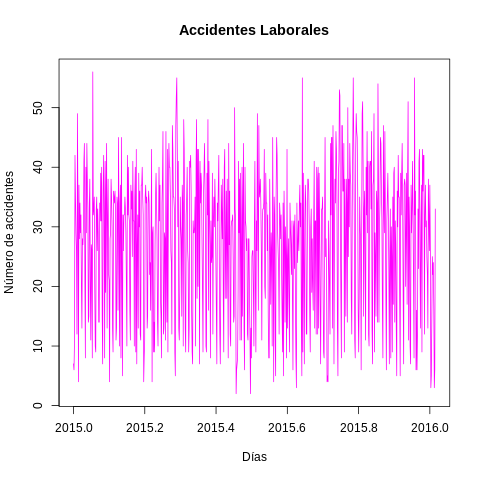

In [166]:
%%R 
setwd("/content")
 x<-read.csv("SerieDeTiempo_AccidentesLaborales.csv",header=T)
 serie<-ts(x$Accidentes,frequency=721,start=c(2015,1,1),end=c(2016,12,31))
 
 plot(serie,main='Accidentes Laborales',xlab='Días',ylab='Número de accidentes', col='magenta')

##Métricas de evaluación

In [168]:
%R range(serie)

array([ 2, 56], dtype=int32)

Como primer paso en el método de series de tiempo, identificamos que nuestra serie sea estacionaria. Esto quiere decir que la media de los datos no tiene tendencia, y su varianza es estacionaria.

Una vez hechas las pruebas, comenzamos con la predicción. Para ello, buscamos un arima que prediga bien los datos (los modelos arima ayudan a la predicción de series estacionarias). 

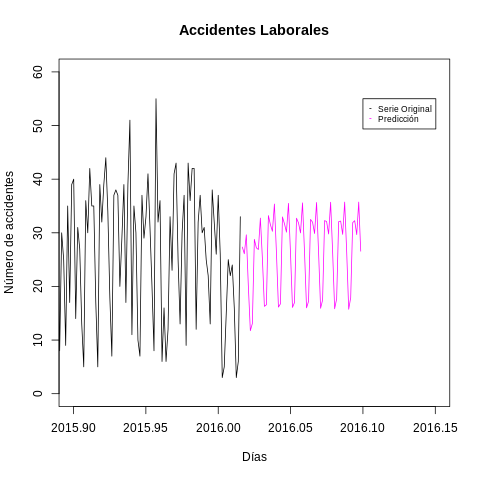

In [160]:
%%R
pd<-predict(arima(serie,order = c(7,0,20),method = 'ML'),n.ahead=60)$pred
plot(serie,main='Accidentes Laborales',  xlim=c(2015.9,2016.15),ylim=c(0,60),xlab='Días',ylab='Número de accidentes')
lines(pd,col='magenta') #Modelo original ARIMA(7,0,20)
legend(x=2016.1, y=55, legend=c('Serie Original', 'Predicción'),col=c('black','magenta'), pch='-',  cex= 0.7,  xpd = T )

In [161]:
%R pd

array([27.33937091, 26.0939382 , 29.62273075, 20.13918346, 11.74872783,
       13.06963699, 28.77184635, 27.19284486, 26.88323801, 32.7431888 ,
       25.26113835, 16.28457349, 16.57563728, 33.20871812, 31.51162524,
       30.2825439 , 35.3625622 , 26.32745901, 16.14681841, 16.75223841,
       32.96142287, 31.68815084, 30.11765937, 35.4858354 , 26.32382526,
       16.0847052 , 16.9875011 , 32.72329737, 31.84401658, 29.9790658 ,
       35.58097988, 26.34176569, 16.00987589, 17.22230776, 32.49634039,
       31.97879098, 29.86568557, 35.65044395, 26.37812113, 15.92564384,
       17.45400132, 32.28212198, 32.09241371, 29.77619679, 35.69673737,
       26.42985596, 15.83503617, 17.68030344, 32.08181515, 32.18514933,
       29.70908466, 35.72238616, 26.49408814, 15.74078535, 17.89930045,
       31.89622945, 32.25754198, 29.66268912, 35.7298931 , 26.56811302])

In [162]:
%R range(pd)

array([11.74872783, 35.7298931 ])

Al observar el comportamiento de los datos, notamos que habrá entre  11 y 36 accidentes durante los siguientes 10 meses.

##Conclusión

Se pronostica un aumento en el número de accidentes diarios, en comparación con los últimos meses de 2016. Además, la mayoría de las lesiones más frecuentes son fracturas, seguidas de amputaciones, dolor y cortaduras ocurridas principalmente en dedos y manos.

Para nuestro objetivo secundario, identificamos que el estado de Texas es el que mayor porcentaje de accidentes tiene en comparación con el resto de los estados, segido por Florida y Pensilvania. Pues solo en estos 3 estados se presentan casi el 40% de los casos de los accidentes totales registrados.


####Un punto a mejorar:
Dado a que no tenemos los costos derivados de los accidentes, no podemos determinar el promedio de gastos  por accidente. 
Si pudieramos considerar a qué se dedica cada persona que tuvo un accidene, sería de grán utilidad para determinar cual es el seguro ideal para cada persona.


